In [31]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
import numpy as np
import sys
writer = SummaryWriter('runs/mnist')

In [32]:
# make the model run on GPU if it is available:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [33]:
# hyper parameters:

input_size = 784 # 28*28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [34]:
# load the data:
train_dataset = torchvision.datasets.MNIST(root = './data', train = True,
                                           transform= transforms.ToTensor(), download= True)

test_dataset = torchvision.datasets.MNIST(root = './data', train = False,
                                           transform= transforms.ToTensor(), download= True)

train_loader = torch.utils.data.DataLoader(dataset= train_dataset, batch_size= batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset= test_dataset, batch_size= batch_size, shuffle = False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


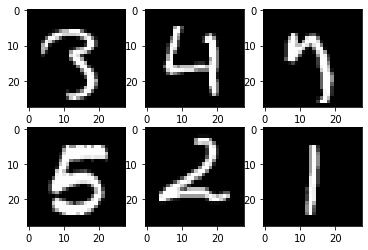

In [35]:
# plot a examples images:
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(samples[i][0], cmap = 'gray')
plt.show()

In [36]:
# the model:

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, X):
        out = self.l1(X)
        out = self.relu(out)
        out = self.l2(out)
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes)
        

In [37]:
# loss and optimizer

crieterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [38]:
# training loop

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i , (images, labels) in enumerate(train_loader):
        # the size 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward
        
        output = model(images)
        loss = crieterion(output, labels)
        
        # backward
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step{i+1}/{n_total_steps}, loss = {loss.item():.4f}')
        
        
        

epoch 1/2, step100/600, loss = 0.5258
epoch 1/2, step200/600, loss = 0.2707
epoch 1/2, step300/600, loss = 0.4157
epoch 1/2, step400/600, loss = 0.1526
epoch 1/2, step500/600, loss = 0.2469
epoch 1/2, step600/600, loss = 0.2066
epoch 2/2, step100/600, loss = 0.2956
epoch 2/2, step200/600, loss = 0.1968
epoch 2/2, step300/600, loss = 0.2408
epoch 2/2, step400/600, loss = 0.1999
epoch 2/2, step500/600, loss = 0.1302
epoch 2/2, step600/600, loss = 0.2435


In [39]:
# test & accuracy

with torch.no_grad():
    n_correct = 0
    n_samples = 0 
    for images , labels in (test_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # value , index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
acc = 100 * n_correct/n_samples

print(f' the accuracy = {acc}')

 the accuracy = 95.43
